Design PD controller for
system: $x'' + \mu x' + kx = u$

The transfer function $W$:

$
p^2x + \mu px + kx = u \\
x(p^2 + \mu p + k) = u \\
W = \frac{1}{p^2 + \mu p + k} 
$



In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from typing import Callable

mu = 13 # 13
k = 2  # 2

def trajectory_tracking(
    x_init: float,
    x_dot_init:float,
    time_start: float,
    time_finish: float,
    time_step: float, 
    Kp:float, 
    Kd:float, 
    Ki:float, 
    x_desired: Callable[[float], float], 
    x_dot_desired: Callable[[float], float], 
    x_dbl_dot: Callable[[float,float,float], float],
    plot_label = None
    ):
  def PID_control(x, t):
    error     = x_desired(t)     - x[0]
    error_dot = x_dot_desired(t) - x[1]
    error_int = x[2] # let pass integral error as 3rd argument
    u = Kp*error + Kd*error_dot + Ki*error_int
    return np.array([
                    x[1], 
                    x_dbl_dot(x[0], x[1], u),
                    error # differentiating integral error leads to proportional error
                    ])

  x0 = np.array([x_init, x_dot_init, 0])
  time = np.arange(time_start, time_finish, time_step)
  solution = odeint(PID_control, x0, time)
  solution_cleared = np.delete(solution, 2, 1)

  plt.plot(time, solution_cleared)
  plt.plot(time, list(map(x_desired, time)))
  plt.xlabel('time')
  
  plt.ylabel("x(t)")
  plt.title(plot_label)

  plt.legend(["x(t)", "x'(t)", "x*(t)"])
  plt.show()


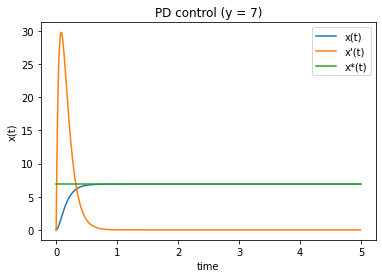

In [0]:
def x_desired_const(t):
  return 7

def x_dot_desired_zero(t):
  return 0

def x_dbl_dot(x, x_dot, u):
  return u - mu*x_dot - k*x

trajectory_tracking(
    x_init=0, 
    x_dot_init=0, 
    time_start=0,
    time_finish=5,
    time_step=0.01, 
    Kp=143, 
    Kd=12, 
    Ki=0, 
    x_desired=x_desired_const, 
    x_dot_desired=x_dot_desired_zero, 
    x_dbl_dot=x_dbl_dot,
    plot_label = "PD control (y = 7)"
    )

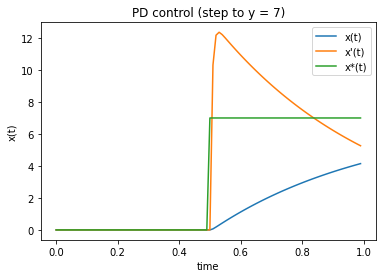

In [0]:
def x_desired_step(t):
  return 0 if t < 0.5 else 7

def x_dot_desired_zero(t):
  return 0

def x_dbl_dot(x, x_dot, u):
  return u - mu*x_dot - k*x

trajectory_tracking(
    x_init=0, 
    x_dot_init=0, 
    time_start=0,
    time_finish=1,
    time_step=0.01, 
    Kp=300, 
    Kd=150, 
    Ki=0,
    x_desired=x_desired_step, 
    x_dot_desired=x_dot_desired_zero, 
    x_dbl_dot=x_dbl_dot,
    plot_label = "PD control (step to y = 7)"
    )

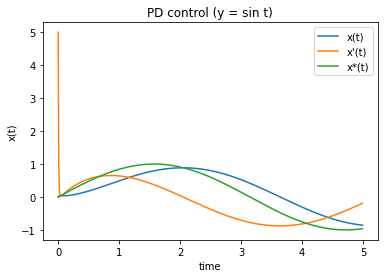

In [0]:
from math import sin

def x_dot_desired_zero(t):
  return 0

def x_dbl_dot(x, x_dot, u):
  return u - mu*x_dot - k*x

trajectory_tracking(
    x_init=0, 
    x_dot_init=5, 
    time_start=0,
    time_finish=5,
    time_step=0.01, 
    Kp=300, 
    Kd=150, 
    Ki=0, 
    x_desired=sin, 
    x_dot_desired=x_dot_desired_zero, 
    x_dbl_dot=x_dbl_dot,
    plot_label = "PD control (y = sin t)"
    )

## Subtask D

In order to implement PD control for the described linear system, we should keep proportional error of the last step, so that we can calculate derivative term as $\frac{\Delta ERROR_P}{\Delta t}$. 

# Subtask E

PI/PID control for $x'' + \mu x' +kx +9.8 = u$

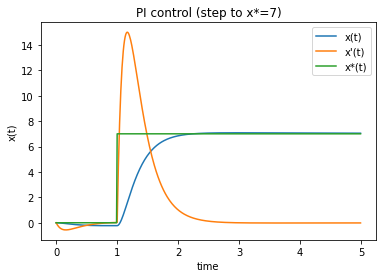

In [0]:
# PI control

def x_desired_step(t):
  return 0 if t < 1 else 7

def x_dot_desired_zero(t):
  return 0

def x_dbl_dot(x, x_dot, u):
  return u - mu*x_dot - k*x - 9.8

trajectory_tracking(
    x_init=0, 
    x_dot_init=0, 
    time_start=0,
    time_finish=5,
    time_step=0.01, 
    Kp=36, 
    Kd=0, 
    Ki=10,
    x_desired=x_desired_step, 
    x_dot_desired=x_dot_desired_zero, 
    x_dbl_dot=x_dbl_dot,
    plot_label = "PI control (step to x*=7)"
    )

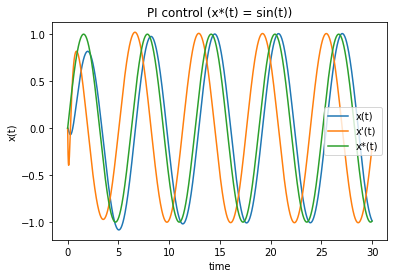

In [0]:
def x_dot_desired_zero(t):
  return 0

def x_dbl_dot(x, x_dot, u):
  return u - mu*x_dot - k*x - 9.8

trajectory_tracking(
    x_init=0, 
    x_dot_init=0, 
    time_start=0,
    time_finish=30,
    time_step=0.01, 
    Kp=36, 
    Kd=0, 
    Ki=10,
    x_desired=sin, 
    x_dot_desired=x_dot_desired_zero, 
    x_dbl_dot=x_dbl_dot,
    plot_label = "PI control (x*(t) = sin(t))"
    )

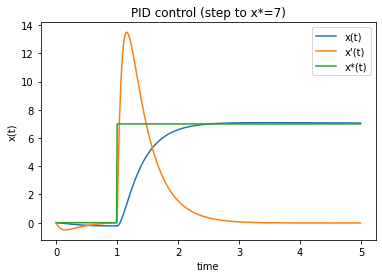

In [0]:
# PID control

def x_desired_step(t):
  return 0 if t < 1 else 7

def x_dot_desired_zero(t):
  return 0

def x_dbl_dot(x, x_dot, u):
  return u - mu*x_dot - k*x - 9.8

trajectory_tracking(
    x_init=0, 
    x_dot_init=0, 
    time_start=0,
    time_finish=5,
    time_step=0.01, 
    Kp=36, 
    Kd=2, 
    Ki=9,
    x_desired=x_desired_step, 
    x_dot_desired=x_dot_desired_zero, 
    x_dbl_dot=x_dbl_dot,
    plot_label = "PID control (step to x*=7)"
    )

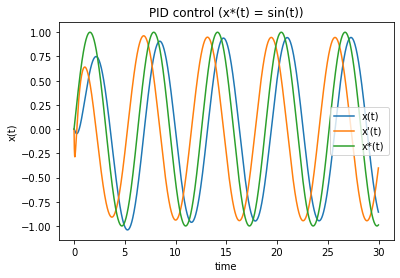

In [0]:
def x_dot_desired_zero(t):
  return 0

def x_dbl_dot(x, x_dot, u):
  return u - mu*x_dot - k*x - 9.8

trajectory_tracking(
    x_init=0, 
    x_dot_init=0, 
    time_start=0,
    time_finish=30,
    time_step=0.01, 
    Kp=36, 
    Kd=2, 
    Ki=9,
    x_desired=sin, 
    x_dot_desired=x_dot_desired_zero, 
    x_dbl_dot=x_dbl_dot,
    plot_label = "PID control (x*(t) = sin(t))"
    )